# **Modeling**

# Part 1: Preparing the Data

In [567]:
import pandas as pd
import numpy as np
np.random.seed(4)
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [568]:
os.getcwd()

'/workspace'

In [569]:
data = pd.read_csv('Crime_Clean2.csv')

In [570]:
data.head()

,Unnamed: 0,Incident ID,City,Police District Name,Block,Crime Name1,Crime Name2,Crime Name3,Victims,Place,...,Other Race %,Month,Day,Hour_Minute,Hour,Hour_Y,Hour_X,Time_of_Day,Season,Weekday
0,0,201268391,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,0.007143,12,2019-12-06,21:16,21,0.707107,-0.707107,Night,Fall,1.0
1,1,201234989,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Crime Against Person,Fondling,SEX OFFENSE - FONDLING,1,Residence - Single Family,...,0.007143,4,2019-04-13,02:00,2,0.866025,0.500000,Late Night,Spring,0.0
2,2,201281727,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Yard,...,0.007143,3,2020-03-13,09:09,9,-0.707107,0.707107,Morning,Winter,1.0
3,3,201265326,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,0.007143,11,2019-11-15,16:33,16,-0.500000,-0.866025,Late Afternoon/Early Evening,Fall,1.0
4,4,201090622,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Street - Other,...,0.007143,7,2016-07-22,22:27,22,0.866025,-0.500000,Night,Summer,1.0


In [571]:
len(data)

235368

In [572]:
data.isnull().sum()

Unnamed: 0                   0
Incident ID                  0
City                       828
Police District Name         0
Block                        0
Crime Name1                165
Crime Name2                165
Crime Name3                165
Victims                      0
Place                        0
Pop                          0
Income                       0
Age                          0
Educational Attainment       0
Bachelors                    0
High School                  0
Means of Transportation      0
Public Transportation        0
Total Laborforce             0
Total Unemployed             0
Start_Date_Time              0
Location                     0
Longitude                    0
Latitude                     0
Male                         0
Female                       0
Black                        0
White                        0
Asian                        0
American Indian              0
Other Race                   0
High School %                0
Bachelor

In [573]:
## Drop City column

data = data.drop('City',1)

In [574]:
##Exclude rows for which Crime Name1 is null

data = data[~data['Crime Name1'].isnull()]

In [575]:
data.isnull().sum()

Unnamed: 0                 0
Incident ID                0
Police District Name       0
Block                      0
Crime Name1                0
Crime Name2                0
Crime Name3                0
Victims                    0
Place                      0
Pop                        0
Income                     0
Age                        0
Educational Attainment     0
Bachelors                  0
High School                0
Means of Transportation    0
Public Transportation      0
Total Laborforce           0
Total Unemployed           0
Start_Date_Time            0
Location                   0
Longitude                  0
Latitude                   0
Male                       0
Female                     0
Black                      0
White                      0
Asian                      0
American Indian            0
Other Race                 0
High School %              0
Bachelors %                0
Public Transportation %    0
Unemployed %               0
Male %        

In [576]:
## Exclude Other category from Analysis

data = data[data['Crime Name1'] != 'Other']

In [577]:
len(data)

187827

In [578]:
## Drop other unnecessary columns

data = data.drop(['Unnamed: 0','Educational Attainment','Bachelors','High School','Means of Transportation','Public Transportation',
          'Total Laborforce','Total Unemployed','Longitude','Latitude', 'Crime Name2','Male','Female','Black','White','Asian','Other Race',
                 'American Indian','Male %', 'Female %','American Indian %', 'Other Race %', 'Asian %','Month','Hour_Minute','Season',
                 'Hour_X','Hour_Y','Hour'],1)

In [579]:
data['Crime Name3'].value_counts().loc[lambda x: x > 1000]

LARCENY - FROM AUTO                           20699
DRUGS - MARIJUANA - POSSESS                   14408
ASSAULT - 2ND DEGREE                          12724
LARCENY - SHOPLIFTING                         12145
DRIVING UNDER THE INFLUENCE LIQUOR            11747
LARCENY (DESCRIBE OFFENSE)                     9687
DAMAGE PROPERTY - PRIVATE                      9123
LARCENY - FROM BLDG                            8310
IDENTITY THEFT                                 4896
LIQUOR - POSSESS                               4411
PUBLIC PEACE - DISORDERLY CONDUCT              4318
AUTO THEFT - VEHICLE THEFT                     4149
LARCENY - AUTO PARTS                           4056
TRESPASSING                                    3378
FRAUD - ILLEGAL USE CREDIT CARDS               3358
DAMAGE PROPERTY (DESCRIBE OFFENSE)             3146
JUVENILE - RUNAWAY                             2817
ASSAULT - SIMPLE                               2792
BURGLARY - FORCED ENTRY-RESIDENTIAL            2710
FRAUD (DESCR

In [580]:
data.columns

Index(['Incident ID', 'Police District Name', 'Block', 'Crime Name1',
       'Crime Name3', 'Victims', 'Place', 'Pop', 'Income', 'Age',
       'Start_Date_Time', 'Location', 'High School %', 'Bachelors %',
       'Public Transportation %', 'Unemployed %', 'White %', 'Black %', 'Day',
       'Time_of_Day', 'Weekday'],
      dtype='object')

In [581]:
data.shape

(187827, 21)

In [582]:
data['Place'].value_counts().loc[lambda x: x > 1000]

Street - In vehicle                   27251
Residence - Single Family             14706
Residence - Apartment/Condo           14260
Street - Residential                  13815
Other/Unknown                         11922
Parking Lot - Residential             11026
Residence - Driveway                   8425
Parking Lot - Commercial               7536
Residence -Townhouse/Duplex            6935
Retail - Department/Discount Store     5918
Street - Commercial                    5208
School/College                         4215
Retail - Mall                          4067
Restaurant                             3883
Grocery/Supermarket                    3748
Street - Other                         3503
Retail - Other                         2798
Residence - Other                      2535
Convenience Store                      2267
Residence - Yard                       2140
Commercial - Office Building           2024
Parking Garage - Residential           1690
Street - Bus Stop               

In [583]:
data['Crime Name1'].value_counts()

Crime Against Property    103669
Crime Against Society      59437
Crime Against Person       21904
Not a Crime                 2817
Name: Crime Name1, dtype: int64

In [584]:
data= data[data['Crime Name1'] != 'Not a Crime']

In [585]:
data.shape

(185010, 21)

In [586]:
classes_gen = data['Crime Name1'].value_counts()

top_classes_gen = list(classes_gen.index.values)

top_classes_gen = sorted(top_classes_gen)
top_classes_gen

['Crime Against Person', 'Crime Against Property', 'Crime Against Society']

In [587]:
num_classes_gen = len(np.unique(top_classes_gen))

In [588]:
data['Police District Name'].value_counts()

SILVER SPRING          41449
WHEATON                36321
MONTGOMERY VILLAGE     31156
BETHESDA               24816
GERMANTOWN             23930
ROCKVILLE              23283
CITY OF TAKOMA PARK     4051
TAKOMA PARK                3
OTHER                      1
Name: Police District Name, dtype: int64

In [589]:
data = data[data['Police District Name'] != 'OTHER']
data = data[data['Police District Name'] != 'TAKOMA PARK']
data['Police District Name'].value_counts()

SILVER SPRING          41449
WHEATON                36321
MONTGOMERY VILLAGE     31156
BETHESDA               24816
GERMANTOWN             23930
ROCKVILLE              23283
CITY OF TAKOMA PARK     4051
Name: Police District Name, dtype: int64

In [590]:
data['Time_of_Day'].value_counts()

Late Afternoon/Early Evening    43627
Night                           43222
Late Night                      35001
Afternoon                       33644
Morning                         19342
Early Morning                   10170
Name: Time_of_Day, dtype: int64

In [591]:
## One-hot encode Place and Police District Variables

data = pd.get_dummies(data, prefix = ['Place','Police District Name','Weekday','Time_of_Day'], 
                      columns = ['Place','Police District Name','Weekday','Time_of_Day'])

In [592]:
data.shape

(185006, 115)

In [593]:
## Get features for each dataset

features1 = data[data.columns[~data.columns.isin(['Incident ID','Day','Block','Crime Name3','Crime Name1','Location','Start_Date_Time','Day'])]]


In [594]:
## Label encode the target variable for each dataset

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

labels_gen1 = le.fit_transform(data['Crime Name1'])


In [595]:
labels_gen1[:10]

array([0, 1, 1, 1, 1, 1, 0, 2, 2, 2])

In [596]:
## Create training and testing data for dataset

from sklearn.model_selection import train_test_split

train_gen1, test_gen1, train_labels_gen1, test_labels_gen1 = train_test_split(features1,labels_gen1,test_size=0.25,random_state=4)


In [597]:
## One-hot encode label-encoded data for Classification metrics

one_hot = preprocessing.OneHotEncoder()
one_hot_labels_gen1 = one_hot.fit_transform(test_labels_gen1.reshape(-1,1))
one_hot_labels_gen1 = one_hot_labels_gen1.toarray()

In [598]:
one_hot_labels_gen1[:,0]

array([0., 0., 1., ..., 0., 0., 0.])

In [599]:
## Baseline/Dummy Model

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [600]:
## Function for Determining Precision

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

def getPrecision(top_classes, test_labels, predictions):

    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(len(top_classes)):
        precision[i], recall[i], _ = precision_recall_curve(test_labels[:, i],
                                                        predictions[:, i])
        average_precision[i] = average_precision_score(test_labels[:, i], predictions[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(test_labels.ravel(),
        predictions.ravel())
    average_precision["micro"] = average_precision_score(test_labels, predictions,
                                                     average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.2f}'
          .format(average_precision["micro"]))

In [601]:
## Function for Determining ROC AUC

from sklearn.metrics import roc_auc_score


def getAUC(test_labels, predictions):

    macro_roc_auc_ovo = roc_auc_score(test_labels, predictions, multi_class="ovo",
                                  average="macro")
    weighted_roc_auc_ovo = roc_auc_score(test_labels, predictions, multi_class="ovo",
                                     average="weighted")
    macro_roc_auc_ovr = roc_auc_score(test_labels, predictions, multi_class="ovr",
                                  average="macro")
    weighted_roc_auc_ovr = roc_auc_score(test_labels, predictions, multi_class="ovr",
                                     average="weighted")
    print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
    print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

In [602]:
def Precision(top_classes, test_labels, predictions):
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(len(top_classes)):
        precision[i], recall[i], _ = precision_recall_curve(test_labels[:, i],
                                                        predictions[:, i])
        average_precision[i] = average_precision_score(test_labels[:, i], predictions[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(test_labels.ravel(),
        predictions.ravel())
    average_precision["micro"] = average_precision_score(test_labels, predictions,
                                                     average="micro")
    return precision, recall, average_precision

In [603]:
def getAvgPrecision(top_classes, test_labels, predictions):
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(len(top_classes)):
        precision[i], recall[i], _ = precision_recall_curve(test_labels[:, i],
                                                        predictions[:, i])
        average_precision[i] = average_precision_score(test_labels[:, i], predictions[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(test_labels.ravel(),
        predictions.ravel())
    average_precision["micro"] = average_precision_score(test_labels, predictions,
                                                     average="micro")
    return average_precision

In [748]:
def getAvgAUC(test_labels, predictions):
    weighted_roc_auc_ovr = roc_auc_score(test_labels, predictions, multi_class="ovr",
                                     average="weighted")
    return weighted_roc_auc_ovr

In [605]:
from sklearn.metrics import recall_score

def getAvgRecallScore(test_labels, predictions):
    weighted_avg_recall = recall_score(test_labels, predictions, average='micro')
    return weighted_avg_recall

# Part 2: Predicting Crimes Using a Random Forest Model With Arbitrary Hyperparameters 

## **Predicting Crimes Against Society, Persons, and Property**

In [606]:
## Baseline Random Forest Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

model = RandomForestClassifier()

model1 = OneVsRestClassifier(model)
model2 = OneVsRestClassifier(model)

In [607]:
model1.fit(train_gen1, train_labels_gen1)

OneVsRestClassifier(estimator=RandomForestClassifier())

In [608]:
from sklearn.metrics import accuracy_score

predictions_gen1 = model1.predict(test_gen1)
accuracy_score(test_labels_gen1, predictions_gen1)

0.7345844504021448

In [609]:
predictions_gen1_prob = model1.predict_proba(test_gen1)

In [610]:
predictions_gen1_prob[:,0]

array([0.        , 0.        , 0.07511737, ..., 0.28026389, 0.11388774,
       0.00722014])

In [611]:
one_hot_labels_gen1[:,0]

array([0., 0., 1., ..., 0., 0., 0.])

In [612]:
getPrecision(top_classes_gen,one_hot_labels_gen1, predictions_gen1_prob)

Average precision score, micro-averaged over all classes: 0.79


In [613]:
getAUC(one_hot_labels_gen1, predictions_gen1_prob)

One-vs-One ROC AUC scores:
0.823003 (macro),
0.837612 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.823003 (macro),
0.837612 (weighted by prevalence)


# Part 3: Can we Achieve Better Classification Accuracy by Balacing the Target Variable Classes?

### **Predicting Crimes Against Society, Persons, and Property**

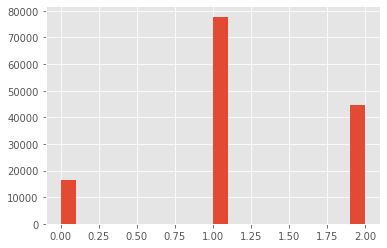

In [614]:
## Plot Target Variables Class Distribution

plt.hist(train_labels_gen1, bins=20)
plt.show()

In [615]:
## Correct for Class Imbalance using SMOTE

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(random_state=4)

X_sm, y_sm = smote.fit_resample(train_gen1, train_labels_gen1)

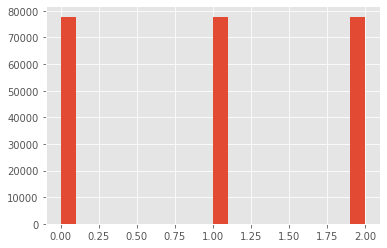

In [616]:
plt.hist(y_sm, bins=20)
plt.show()

In [617]:
## Correct for Class Imbalance by Oversampling Minority Class

smote2 = SMOTE('minority')

X_sm2_gen, y_sm2_gen = smote2.fit_resample(train_gen1, train_labels_gen1)

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


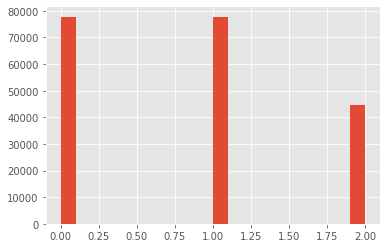

In [618]:
plt.hist(y_sm2_gen, bins=20)
plt.show()

In [619]:
## Correct for Class Imbalance by Undersampling from Majority Class

under = RandomUnderSampler('majority')

X_u, Y_u = under.fit_resample(train_gen1, train_labels_gen1)

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


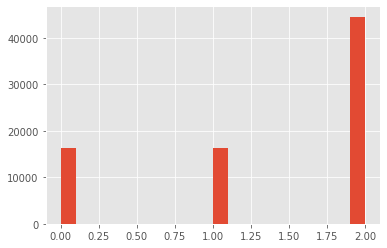

In [620]:
plt.hist(Y_u, bins=20)
plt.show()

In [621]:
model.fit(X_sm,y_sm)

predictions = model.predict(test_gen1)

print('Accuracy of SMOTE Balanced Data: ' + str(accuracy_score(test_labels_gen1, predictions)))

Accuracy of SMOTE Balanced Data: 0.6946726628037706


In [622]:
predictions = model.predict_proba(test_gen1)

In [623]:
getPrecision(top_classes_gen, one_hot_labels_gen1, predictions)

Average precision score, micro-averaged over all classes: 0.76


In [624]:
getAUC(one_hot_labels_gen1, predictions)

One-vs-One ROC AUC scores:
0.810440 (macro),
0.824306 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.810440 (macro),
0.824306 (weighted by prevalence)


In [625]:
model.fit(X_sm2_gen,y_sm2_gen)

predictions2 = model.predict(test_gen1)

print('Accuracy of Minority Oversampled Data: ' + str(accuracy_score(test_labels_gen1, predictions2)))

Accuracy of Minority Oversampled Data: 0.6982184554181441


In [626]:
predictions2_prob = model.predict_proba(test_gen1)

In [627]:
getPrecision(top_classes_gen, one_hot_labels_gen1, predictions2_prob)

Average precision score, micro-averaged over all classes: 0.76


In [628]:
getAUC(one_hot_labels_gen1, predictions2_prob)

One-vs-One ROC AUC scores:
0.811242 (macro),
0.825977 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.811242 (macro),
0.825977 (weighted by prevalence)


In [629]:
model.fit(X_u, Y_u)

predictions = model.predict(test_gen1)

print('Accuracy of Majority Undersampled Data: ' + str(accuracy_score(test_labels_gen1, predictions)))

Accuracy of Majority Undersampled Data: 0.6170976390210153


In [630]:
predictions = model.predict_proba(test_gen1)

In [631]:
getPrecision(top_classes_gen, one_hot_labels_gen1, predictions)

Average precision score, micro-averaged over all classes: 0.68


In [632]:
getAUC(one_hot_labels_gen1, predictions)

One-vs-One ROC AUC scores:
0.813240 (macro),
0.824045 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.813240 (macro),
0.824045 (weighted by prevalence)


# Part 4: Can we Achieve Better Classification Accuracy Using Hyperparameter-Tuned and Cross-Validated Random Forest and Gradient Boosted Machine Models?

### Baseline Model Accuracy

In [656]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')

scores1 = evaluate_model(test_gen1, test_labels_gen1, dummy)
print('Mean Accuracy:' + str(np.mean(scores1)))

Mean Accuracy:0.5592190623657923


### **Predicting Crimes Against Persons, Society, Property (Class Imbalance)**


### Hyperparameter-Tuned Random Forest Model

In [633]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

param_grid_orig = {
    'n_estimators': np.linspace(10,200).astype(int),
    'max_depth': list(np.linspace(3,30).astype(int)),
    'max_features': ['auto','sqrt'] + list(np.arange(0.3,1,0.1)),
    'max_leaf_nodes': list(np.linspace(10,50,500).astype(int)),
    'min_samples_split': [2,5,10,15,20],
    'bootstrap': [True,False]
}

estimator = RandomForestClassifier(random_state=4)

rs = RandomizedSearchCV(estimator, param_grid_orig, n_jobs=-1, cv=KFold(5, random_state=4, shuffle=True), n_iter=10,
                        verbose = 3)

rs.fit(train_gen1, train_labels_gen1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=RandomForestClassifier(random_state=4), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 3, 4, 4, 5, 5, 6, 6, 7,
                                                      7, 8, 9, 9, 10, 10, 11,
                                                      11, 12, 12, 13, 14, 14,
                                                      15, 15, 16, 16, 17, 17,
                                                      18, 18, ...],
                                        'max_features': ['auto', 'sqrt', 0.3,
                                                         0.4, 0.5,
                                                         0.6000000000000001,
                                                         0.7000000000000002,
                                                         0....
                                    

In [634]:
print(rs.best_params_)

{'n_estimators': 180, 'min_samples_split': 2, 'max_leaf_nodes': 34, 'max_features': 0.5, 'max_depth': 30, 'bootstrap': True}


In [635]:
best_model_rf = rs.best_estimator_
ovr_best_model_rf = OneVsRestClassifier(best_model_rf)

In [636]:
ovr_best_model_rf.fit(train_gen1,train_labels_gen1)

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=30,
                                                     max_features=0.5,
                                                     max_leaf_nodes=34,
                                                     n_estimators=180,
                                                     random_state=4))

In [637]:
predictions_rf = ovr_best_model_rf.predict(test_gen1)
accuracy_score(test_labels_gen1, predictions_rf)

0.7344114849087607

In [638]:
predictions_rf_prob = ovr_best_model_rf.predict_proba(test_gen1)

In [639]:
getPrecision(top_classes_gen, one_hot_labels_gen1, predictions_rf_prob)

Average precision score, micro-averaged over all classes: 0.81


In [640]:
getAUC(one_hot_labels_gen1, predictions_rf_prob)

One-vs-One ROC AUC scores:
0.836789 (macro),
0.842612 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.836789 (macro),
0.842612 (weighted by prevalence)


### Hyperparameter-tuned Xtreme Gradient Boosted Machine

In [641]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=4, eval_metric='mlogloss', use_label_encoder=False)

param_grid2 = {
    'n_estimators': np.linspace(10,200).astype(int),
    'max_depth': [None] + list(np.linspace(3,20).astype(int)),
    'learning_rate': [0.01, 0.05, 0.1],
    'colsample_bytree' : [0.3, 0.5, 0.7]
}

rs2 = RandomizedSearchCV(xgb, param_grid2, cv=KFold(3, random_state=4, shuffle=True),n_iter=10, random_state=4)

rs2.fit(train_gen1, train_labels_gen1)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='mlogloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_...
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.7],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [None, 3, 3, 3, 4,

In [642]:
print(rs2.best_params_)

{'n_estimators': 60, 'max_depth': 14, 'learning_rate': 0.05, 'colsample_bytree': 0.5}


In [643]:
best_model_xgb = rs2.best_estimator_

In [644]:
best_model_xgb.fit(train_gen1,train_labels_gen1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=14, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=60, n_jobs=28,
              num_parallel_tree=1, objective='multi:softprob', random_state=4,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [645]:
predictions_xgb = best_model_xgb.predict(test_gen1)
accuracy_score(test_labels_gen1, predictions_xgb)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


0.7479460347660641

In [646]:
predictions_xgb_prob = best_model_xgb.predict_proba(test_gen1)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


In [647]:
getPrecision(top_classes_gen, one_hot_labels_gen1, predictions_xgb_prob)

Average precision score, micro-averaged over all classes: 0.83


In [648]:
getAUC(one_hot_labels_gen1, predictions_xgb_prob)

One-vs-One ROC AUC scores:
0.855272 (macro),
0.862485 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.855272 (macro),
0.862485 (weighted by prevalence)


### Hyperparmeter-tuned Light Gradient Boosted Machine

In [649]:



rs3.fit(train_gen1, train_labels_gen1)

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fractio

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=4, shuffle=True),
                   estimator=LGBMClassifier(random_state=4),
                   param_distributions={'bagging_fraction': [0.5, 0.7, 0.9],
                                        'feature_fraction': [0.5, 0.7, 0.9],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'n_estimators': array([  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,
        53,  57,  61,  65,  69,  73,  77,  81,  85,  89,  93,  97, 102,
       106, 110, 114, 118, 122, 126, 130, 134, 138, 142, 146, 151, 155,
       159, 163, 167, 171, 175, 179, 183, 1

In [650]:
print(rs3.best_params_)

{'n_estimators': 191, 'max_depth': 12, 'learning_rate': 0.1, 'feature_fraction': 0.5, 'bagging_fraction': 0.7}


In [651]:
best_model_lgbm = rs3.best_estimator_
best_model_lgbm.fit(train_gen1, train_labels_gen1)

LGBMClassifier(bagging_fraction=0.7, feature_fraction=0.5, max_depth=12,
               n_estimators=191, random_state=4)

In [652]:
predictions_lgbm = best_model_lgbm.predict(test_gen1)

accuracy_score(test_labels_gen1, predictions_lgbm)

0.7529836547608753

In [653]:
predictions_lgbm_prob = best_model_lgbm.predict_proba(test_gen1)

In [654]:
getPrecision(top_classes_gen, one_hot_labels_gen1, predictions_lgbm_prob)

Average precision score, micro-averaged over all classes: 0.84


In [655]:
getAUC(one_hot_labels_gen1, predictions_lgbm_prob)

One-vs-One ROC AUC scores:
0.858995 (macro),
0.866196 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.858995 (macro),
0.866196 (weighted by prevalence)


### **Predicting Crimes Against Persons, Society, Property (Balanced Classes)**

### Hyperparameter-Tuned Random Forest Model

In [657]:
rs.fit(X_sm2_gen, y_sm2_gen)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=RandomForestClassifier(random_state=4), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 3, 4, 4, 5, 5, 6, 6, 7,
                                                      7, 8, 9, 9, 10, 10, 11,
                                                      11, 12, 12, 13, 14, 14,
                                                      15, 15, 16, 16, 17, 17,
                                                      18, 18, ...],
                                        'max_features': ['auto', 'sqrt', 0.3,
                                                         0.4, 0.5,
                                                         0.6000000000000001,
                                                         0.7000000000000002,
                                                         0....
                                    

In [658]:
print(rs.best_params_)

{'n_estimators': 52, 'min_samples_split': 15, 'max_leaf_nodes': 49, 'max_features': 0.5, 'max_depth': 22, 'bootstrap': False}


In [659]:
best_model_gen_rf = rs.best_estimator_

ovr_best_model_gen_rf = OneVsRestClassifier(best_model_gen_rf)

In [660]:
ovr_best_model_gen_rf.fit(X_sm2_gen, y_sm2_gen)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=False,
                                                     max_depth=22,
                                                     max_features=0.5,
                                                     max_leaf_nodes=49,
                                                     min_samples_split=15,
                                                     n_estimators=52,
                                                     random_state=4))

In [661]:
predictions_gen_rf = ovr_best_model_gen_rf.predict(test_gen1)
accuracy_score(test_labels_gen1, predictions_gen_rf)

0.6538311856784571

In [662]:
predictions_gen_rf_prob = ovr_best_model_gen_rf.predict_proba(test_gen1)

In [663]:
getPrecision(top_classes_gen, one_hot_labels_gen1, predictions_gen_rf_prob)

Average precision score, micro-averaged over all classes: 0.75


In [664]:
getAUC(one_hot_labels_gen1, predictions_gen_rf_prob)

One-vs-One ROC AUC scores:
0.824909 (macro),
0.832193 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.824909 (macro),
0.832193 (weighted by prevalence)


### Hyperparameter-Tuned Xtreme Gradient Boosted Machine

In [665]:
rs2.fit(X_sm2_gen, y_sm2_gen)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='mlogloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_...
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.7],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [None, 3, 3, 3, 4,

In [666]:
print(rs2.best_params_)

{'n_estimators': 184, 'max_depth': 14, 'learning_rate': 0.1, 'colsample_bytree': 0.5}


In [667]:
best_model_gen_xgb = rs2.best_estimator_

In [668]:
best_model_gen_xgb.fit(X_sm2_gen, y_sm2_gen)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=14, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=184, n_jobs=28,
              num_parallel_tree=1, objective='multi:softprob', random_state=4,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [669]:
predictions_gen_xgb = best_model_gen_xgb.predict(test_gen1)
accuracy_score(test_labels_gen1, predictions_gen_xgb)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


0.7270388307532647

In [670]:
predictions_gen_xgb_prob = best_model_gen_xgb.predict_proba(test_gen1)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


In [671]:
getPrecision(top_classes_gen, one_hot_labels_gen1, predictions_gen_xgb_prob)

Average precision score, micro-averaged over all classes: 0.81


In [672]:
getAUC(one_hot_labels_gen1, predictions_gen_xgb_prob)

One-vs-One ROC AUC scores:
0.844945 (macro),
0.856479 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.844945 (macro),
0.856479 (weighted by prevalence)


### Hyperparameter-Tuned Light Gradient Boosted Machine

In [673]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=4)

param_grid3 = {'n_estimators': np.linspace(0,200).astype(int),
              'max_depth': [None] + list(np.linspace(3,20).astype(int)),
              'learning_rate': [0.01, 0.1, 0.2],
               'bagging_fraction': [0.5,0.7,0.9],
               'feature_fraction': [0.5,0.7,0.9],
              }

rs3 = RandomizedSearchCV(lgbm, param_grid3, cv=KFold(3, random_state=4, shuffle=True), n_iter=10)

rs3.fit(X_sm2_gen, y_sm2_gen)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fractio

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
                   estimator=LGBMClassifier(random_state=4),
                   param_distributions={'bagging_fraction': [0.5, 0.7, 0.9],
                                        'feature_fraction': [0.5, 0.7, 0.9],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'n_estimators': array([  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,
        53,  57,  61,  65,  69,  73,  77,  81,  85,  89,  93,  97, 102,
       106, 110, 114, 118, 122, 126, 130, 134, 138, 142, 146, 151, 155,
       159, 163, 167, 171, 175, 179, 183, 18

In [674]:
print(rs3.best_params_)

{'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.2, 'feature_fraction': 0.9, 'bagging_fraction': 0.5}


In [675]:
best_model_gen_lgbm = rs3.best_estimator_
best_model_gen_lgbm.fit(X_sm2_gen, y_sm2_gen)

LGBMClassifier(bagging_fraction=0.5, feature_fraction=0.9, learning_rate=0.2,
               max_depth=10, n_estimators=200, random_state=4)

In [676]:
predictions_gen_lgbm = best_model_gen_lgbm.predict(test_gen1)

accuracy_score(test_labels_gen1, predictions_gen_lgbm)

0.7390383118567846

In [677]:
predictions_gen_lgbm_prob = best_model_gen_lgbm.predict_proba(test_gen1)

In [678]:
getPrecision(top_classes_gen, one_hot_labels_gen1, predictions_gen_lgbm_prob)

Average precision score, micro-averaged over all classes: 0.82


In [679]:
getAUC(one_hot_labels_gen1, predictions_gen_lgbm_prob)

One-vs-One ROC AUC scores:
0.853344 (macro),
0.861714 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.853344 (macro),
0.861714 (weighted by prevalence)


# Part 5: Comparison and Analysis of Class Balanced and Class Imbalanced Models

In [680]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    plt.show()

In [681]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

def getROCdata(top_classes,y_test,predictions_new):

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(top_classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions_new[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), predictions_new.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(top_classes))]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(len(top_classes)):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= len(top_classes)

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
    for i, color in zip(range(len(top_classes)), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC Curve')
    plt.legend(loc="lower right")
    fig = plt.gcf()
    fig.set_size_inches(10,10)
    plt.show()

In [682]:

def plotPrecisionRecall(top_classes, recall, precision, average_precision):
    # setup plot details
    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

    plt.figure(figsize=(14, 8))
    f_scores = np.linspace(0.2, 0.8, num=4)
    lines = []
    labels = []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
        plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

    lines.append(l)
    labels.append('iso-f1 curves')
    l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
    lines.append(l)
    labels.append('micro-average Precision-recall (area = {0:0.2f})'
                  ''.format(average_precision["micro"]))

    for i, color in zip(range(len(top_classes)), colors):
        l, = plt.plot(recall[i], precision[i], color=color, lw=2)
        lines.append(l)
        labels.append('Precision-recall for class:{0} (area = {1:0.2f})'
                      ''.format(i, average_precision[i]))

    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.25)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve to multi-class')
    plt.legend(lines, labels, loc=(0, -.2), prop=dict(size=10))
    fig = plt.gcf()
    fig.set_size_inches(10,10)

    plt.show()

In [683]:
def plotPrecision(recall, precision, average_precision):

    plt.figure()
    plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b')#,
                     #**step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(
        'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
        .format(average_precision["micro"]))
    fig = plt.gcf()
    fig.set_size_inches(10,10)

In [684]:
def plotImportances(top_importances, top_features_list):
    x_values = list(range(len(top_importances)))
    plt.bar(x_values, top_importances, orientation= 'vertical')
    plt.xticks(x_values, top_features_list, rotation = 'vertical')
    plt.ylabel('Importance')
    plt.xlabel('Variable')
    plt.title('Top Variable Importances')
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    plt.show()

In [685]:
def getImportances(feature_importances):
    top_importances = []
    top_features_list = []

    for x,y in feature_importances:
        if(y > 0.025):
            top_features_list.append(x)
            top_importances.append(y)
    return top_features_list, top_importances

### Part 4A: Confusion Matrices, ROC Curves, and Precision-Recall Curves

### **Predicting Crimes Against Society, Persons, and Property (Balanced Classes)**

In [686]:
importances1 = list(best_model_gen_rf.feature_importances_)
feature_list1 = list(features1.columns)
feature_importances1 = [(feature, importance) for feature, importance in zip(feature_list1,importances1)]
feature_importances1 = sorted(feature_importances1, key = lambda x: x[1], reverse=True)

In [687]:
top_features_list1, top_importances1 = getImportances(feature_importances1)

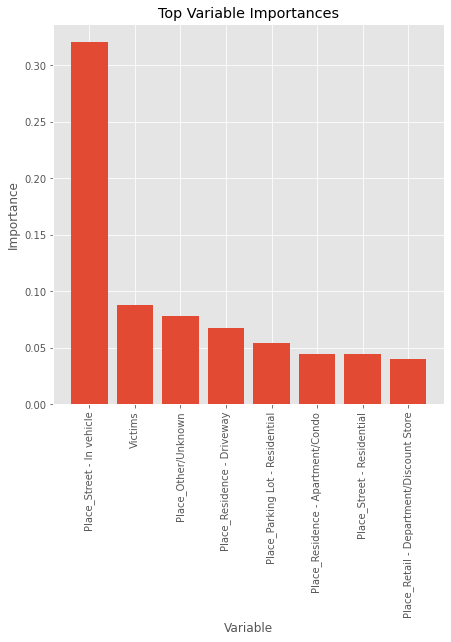

In [688]:
plotImportances(top_importances1, top_features_list1)

Confusion matrix, without normalization


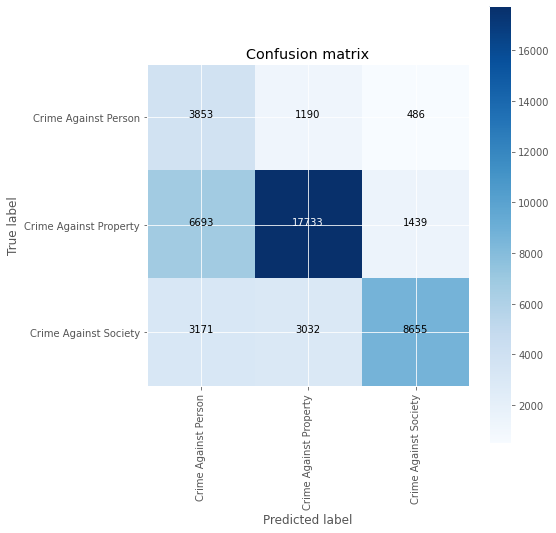

In [689]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(test_labels_gen1, np.argmax(predictions_gen_rf_prob, axis=1))

# Plot normalized confusion matrix
fig = plt.figure()
fig.set_size_inches(10, 10, forward=True)
#fig.align_labels()

# fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plot_confusion_matrix(cnf_matrix, classes=np.asarray(top_classes_gen), normalize=False,
                      title='Confusion matrix')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


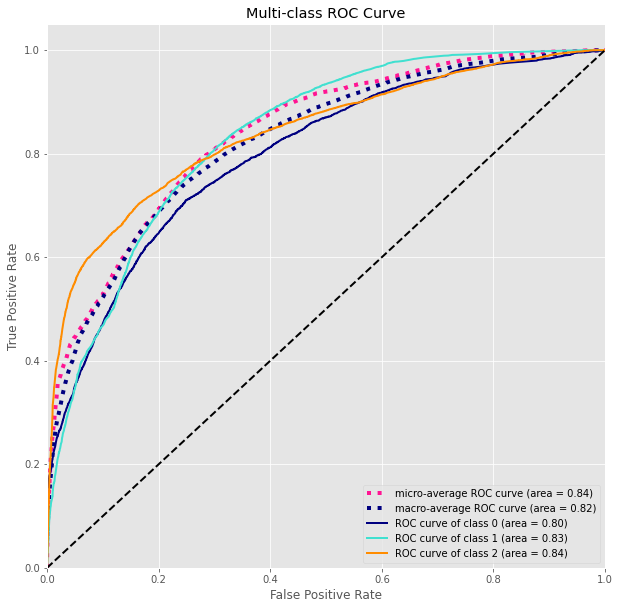

In [690]:
getROCdata(top_classes_gen,one_hot_labels_gen1,predictions_gen_rf_prob)

In [691]:
precision, recall, average_precision = Precision(top_classes_gen, one_hot_labels_gen1, predictions_gen_rf_prob)

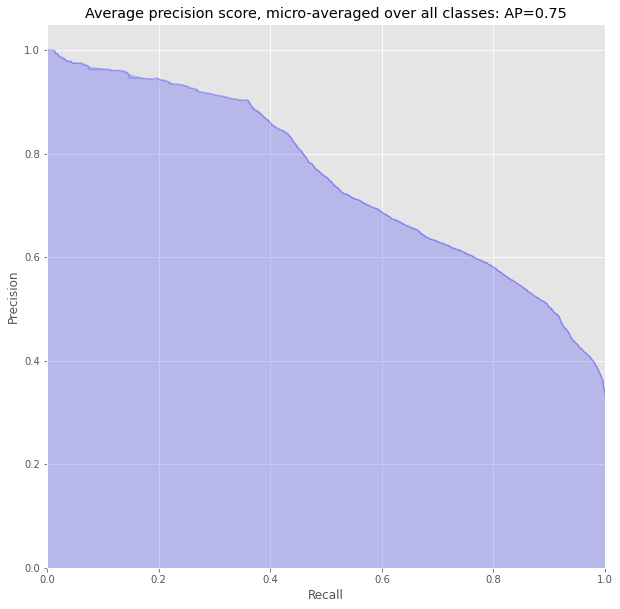

In [692]:
plotPrecision(recall,precision,average_precision)

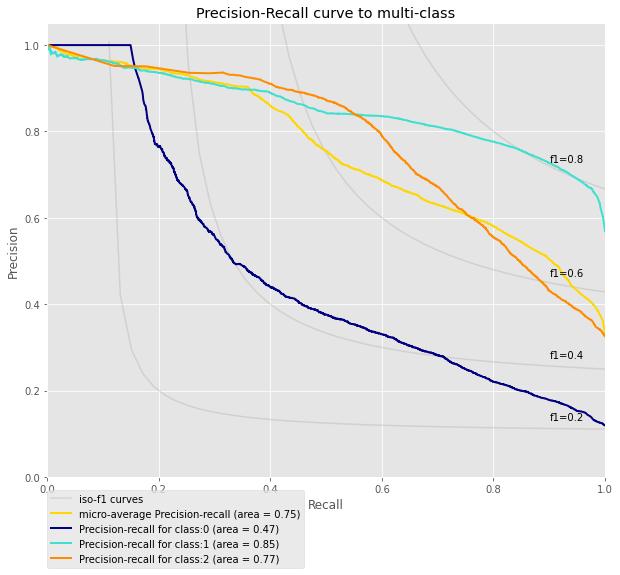

In [693]:
plotPrecisionRecall(top_classes_gen,recall,precision,average_precision)

In [694]:
importances2 = list(best_model_gen_xgb.feature_importances_)
feature_list2 = list(features1.columns)
feature_importances2 = [(feature, importance) for feature, importance in zip(feature_list2,importances2)]
feature_importances2 = sorted(feature_importances2, key = lambda x: x[1], reverse=True)

In [695]:
top_features_list2, top_importances2 = getImportances(feature_importances2)

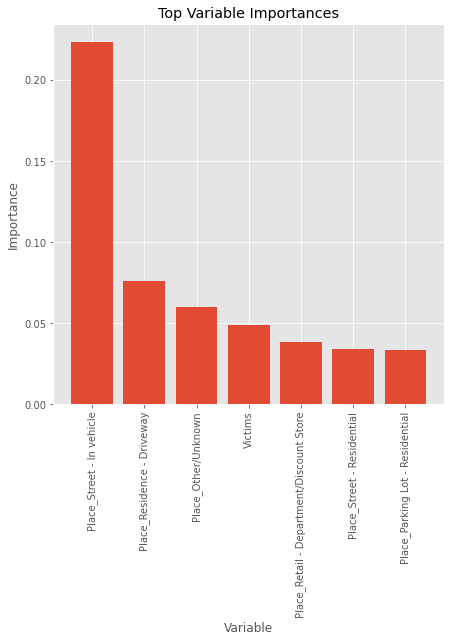

In [696]:
plotImportances(top_importances2, top_features_list2)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


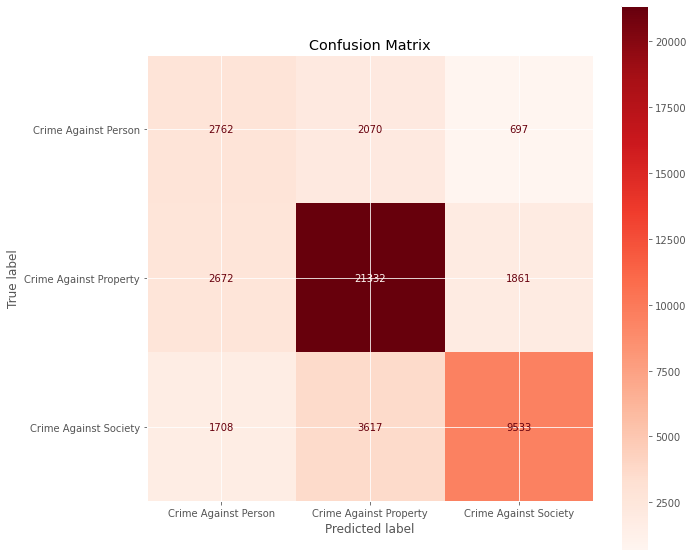

In [697]:
from sklearn.metrics import plot_confusion_matrix as plot_cm

plot_cm(best_model_gen_xgb, test_gen1, test_labels_gen1, display_labels=top_classes_gen, cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


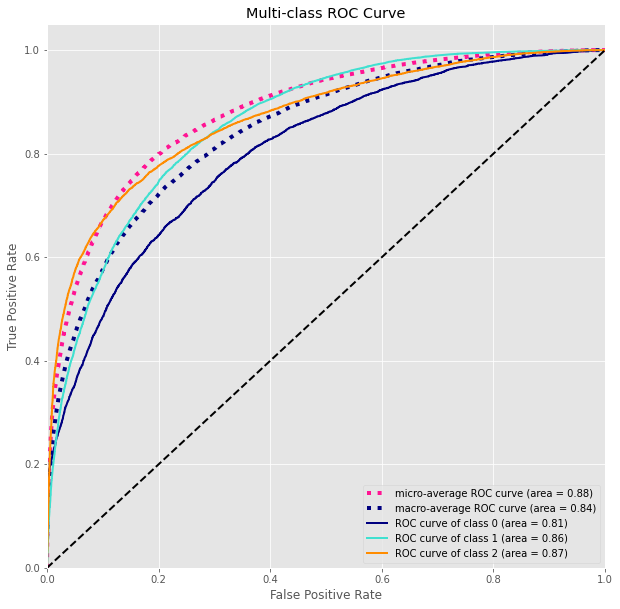

In [698]:
getROCdata(top_classes_gen,one_hot_labels_gen1,predictions_gen_xgb_prob)

In [699]:
precision, recall, average_precision = Precision(top_classes_gen, one_hot_labels_gen1, predictions_gen_xgb_prob)

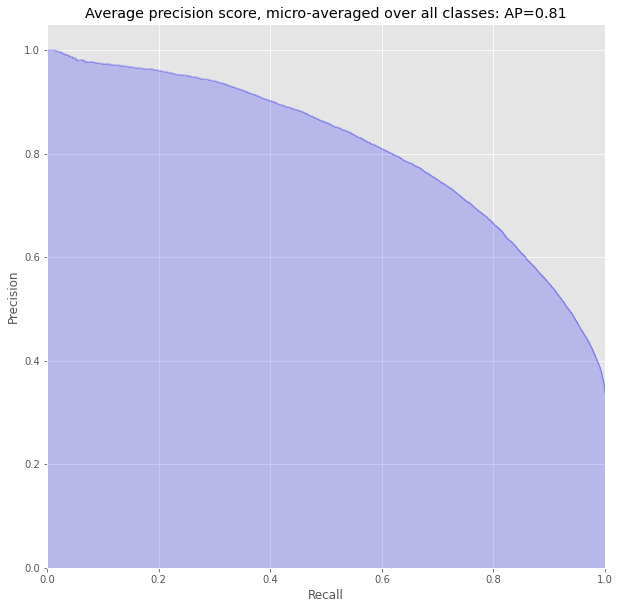

In [700]:
plotPrecision(recall, precision, average_precision)

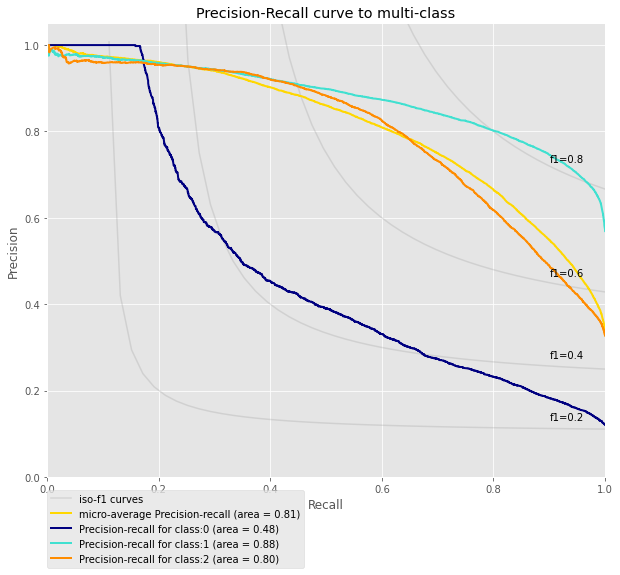

In [701]:
plotPrecisionRecall(top_classes_gen,recall,precision,average_precision)

In [702]:
lgbm_importances = best_model_gen_lgbm.booster_.feature_importance(importance_type='gain')/sum(best_model_gen_lgbm.booster_.feature_importance(importance_type='gain'))
importances3 = list(lgbm_importances)
feature_list3 = list(features1.columns)
feature_importances3 = [(feature, importance) for feature, importance in zip(feature_list3,importances3)]
feature_importances3 = sorted(feature_importances3, key = lambda x: x[1], reverse=True)

In [703]:
top_features_list3, top_importances3 = getImportances(feature_importances3)

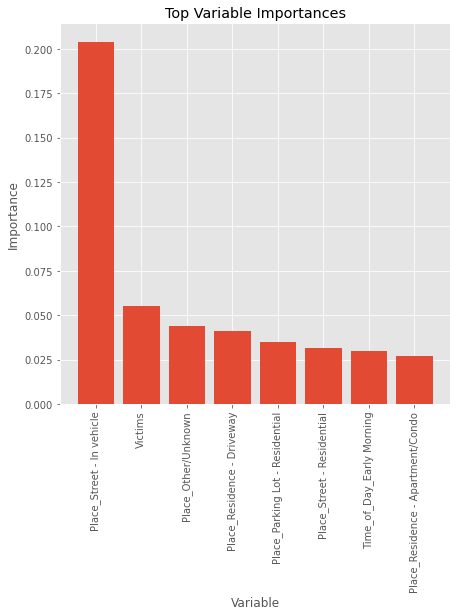

In [704]:
plotImportances(top_importances3, top_features_list3)

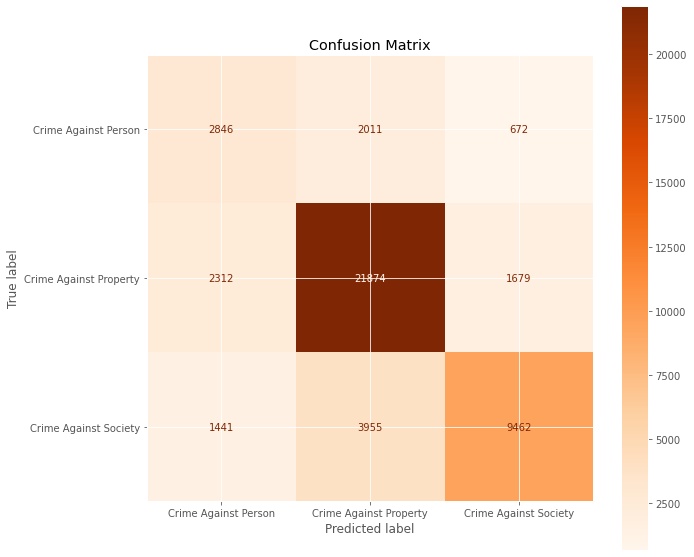

In [705]:
plot_cm(best_model_gen_lgbm, test_gen1, test_labels_gen1, display_labels=top_classes_gen, cmap=plt.cm.Oranges)
plt.title('Confusion Matrix')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


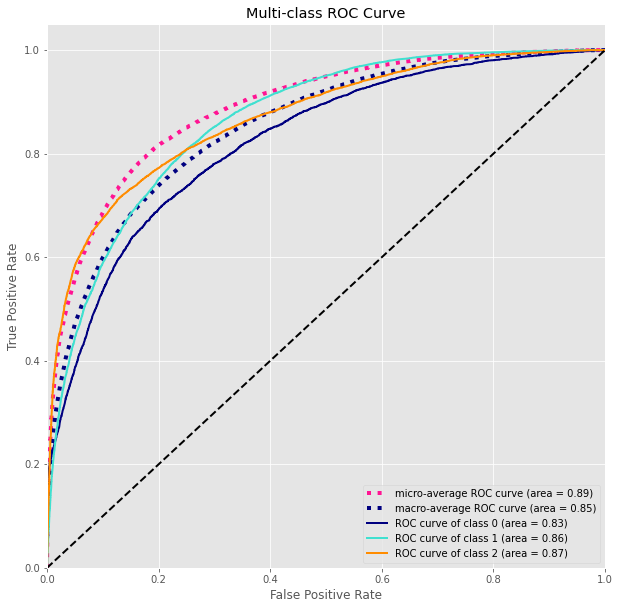

In [706]:
getROCdata(top_classes_gen,one_hot_labels_gen1,predictions_gen_lgbm_prob)

In [707]:
precision, recall, average_precision = Precision(top_classes_gen, one_hot_labels_gen1, predictions_gen_lgbm_prob)

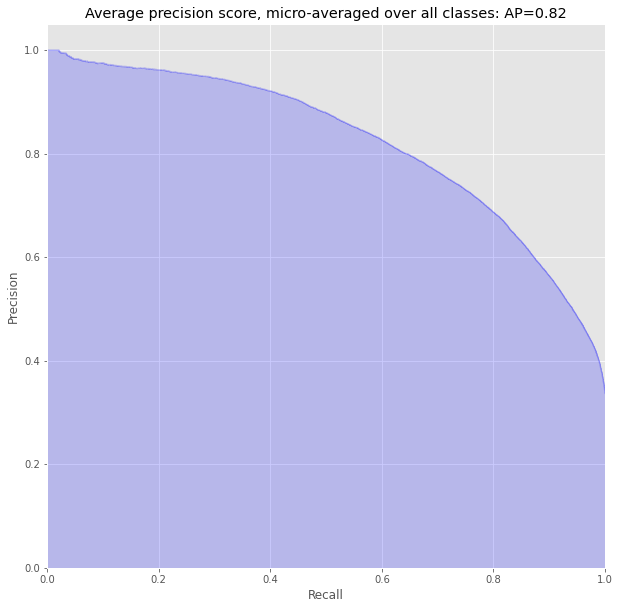

In [708]:
plotPrecision(recall, precision, average_precision)

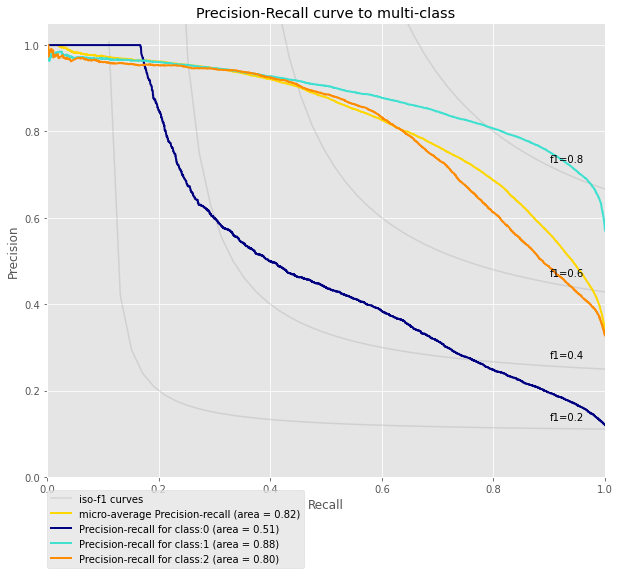

In [709]:
plotPrecisionRecall(top_classes_gen,recall,precision,average_precision)

### **Predicting Crimes Against Society, Persons, and Property (Imbalanced Classes)**

In [710]:
importances1 = list(best_model_rf.feature_importances_)
feature_list1 = list(features1.columns)
feature_importances1 = [(feature, importance) for feature, importance in zip(feature_list1,importances1)]
feature_importances1 = sorted(feature_importances1, key = lambda x: x[1], reverse=True)

In [711]:
top_features_list1, top_importances1 = getImportances(feature_importances1)

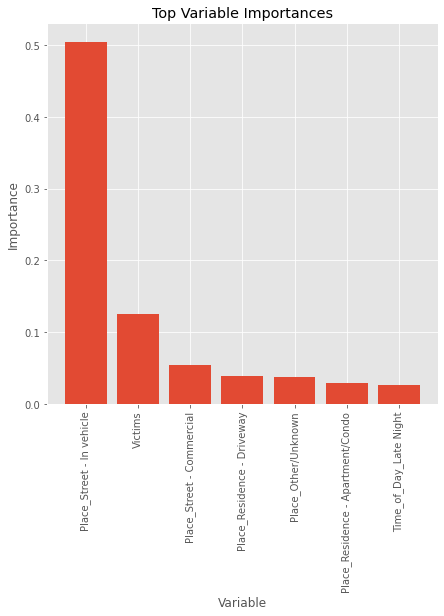

In [712]:
plotImportances(top_importances1, top_features_list1)

Confusion matrix, without normalization


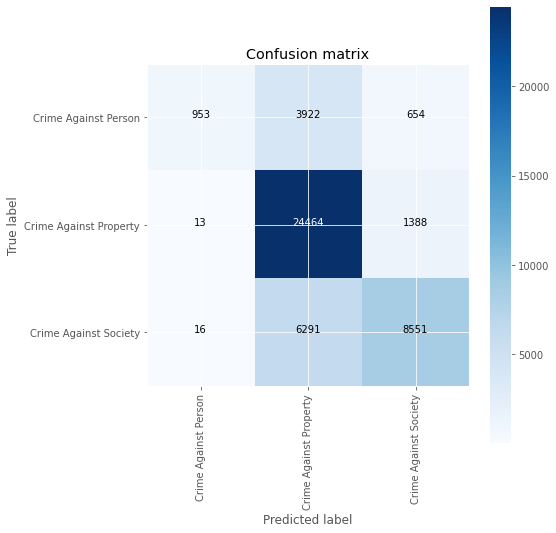

In [713]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(test_labels_gen1, np.argmax(predictions_rf_prob, axis=1))

# Plot normalized confusion matrix
fig = plt.figure()
fig.set_size_inches(10, 10, forward=True)
#fig.align_labels()

# fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plot_confusion_matrix(cnf_matrix, classes=np.asarray(top_classes_gen), normalize=False,
                      title='Confusion matrix')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


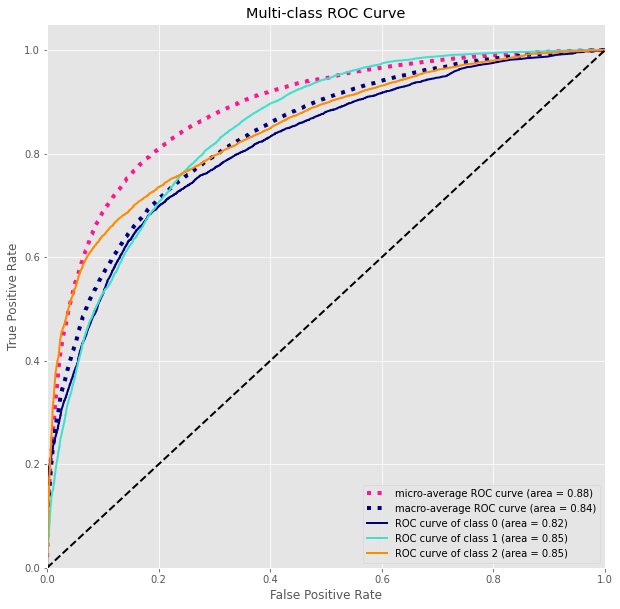

In [714]:
getROCdata(top_classes_gen,one_hot_labels_gen1,predictions_rf_prob)

In [715]:
precision, recall, average_precision = Precision(top_classes_gen, one_hot_labels_gen1, predictions_rf_prob)

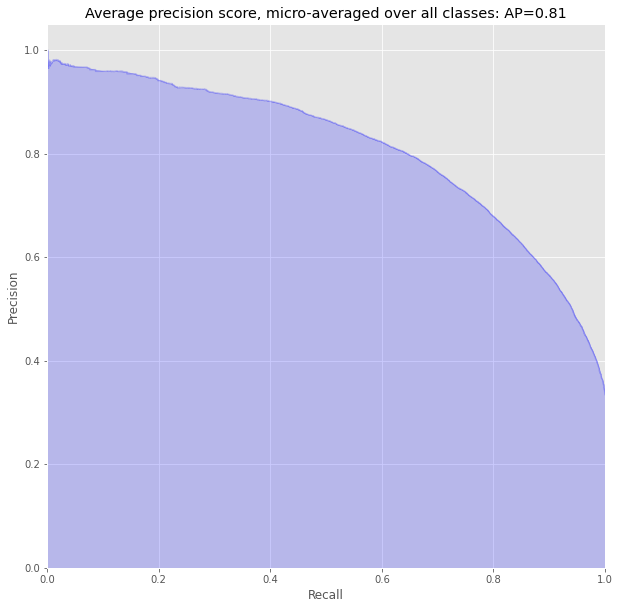

In [716]:
plotPrecision(recall,precision,average_precision)

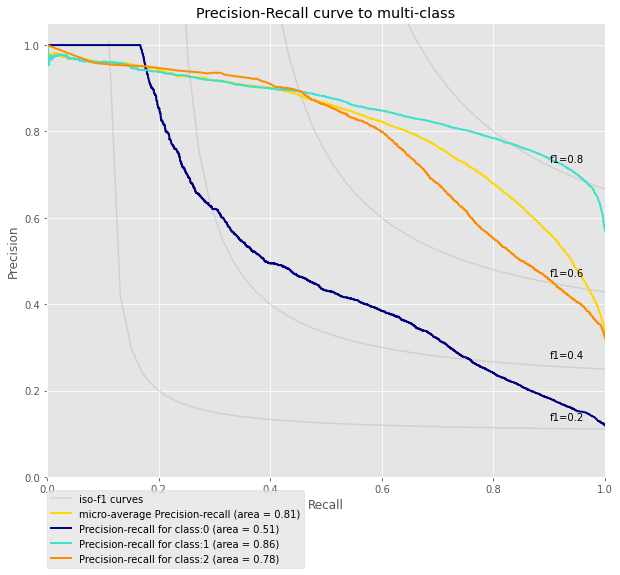

In [717]:
plotPrecisionRecall(top_classes_gen,recall,precision,average_precision)

In [718]:
importances2 = list(best_model_xgb.feature_importances_)
feature_list2 = list(features1.columns)
feature_importances2 = [(feature, importance) for feature, importance in zip(feature_list2,importances2)]
feature_importances2 = sorted(feature_importances2, key = lambda x: x[1], reverse=True)

In [719]:
top_features_list2, top_importances2 = getImportances(feature_importances2)

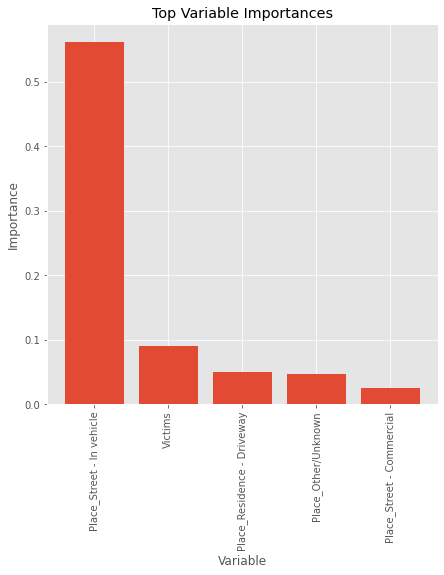

In [720]:
plotImportances(top_importances2, top_features_list2)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


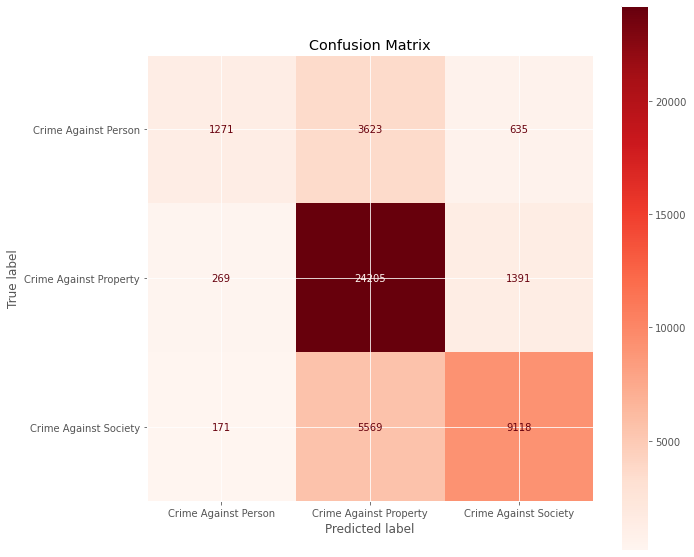

In [721]:
from sklearn.metrics import plot_confusion_matrix as plot_cm

plot_cm(best_model_xgb, test_gen1, test_labels_gen1, display_labels=top_classes_gen, cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


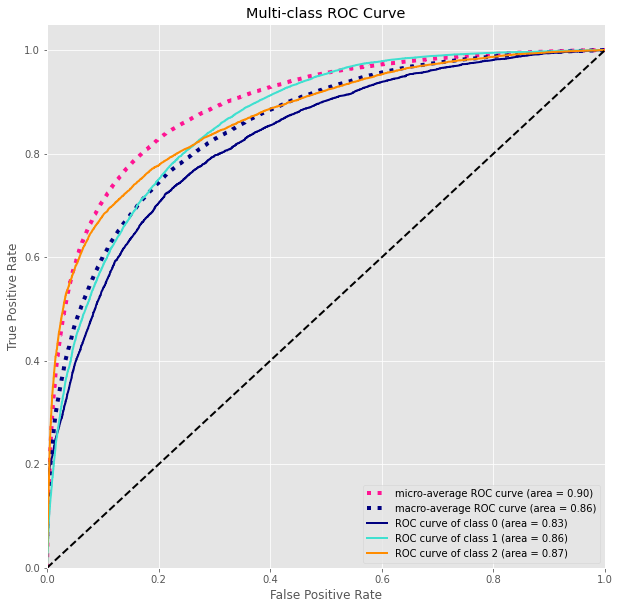

In [722]:
getROCdata(top_classes_gen,one_hot_labels_gen1,predictions_xgb_prob)

In [723]:
precision, recall, average_precision = Precision(top_classes_gen, one_hot_labels_gen1, predictions_xgb_prob)

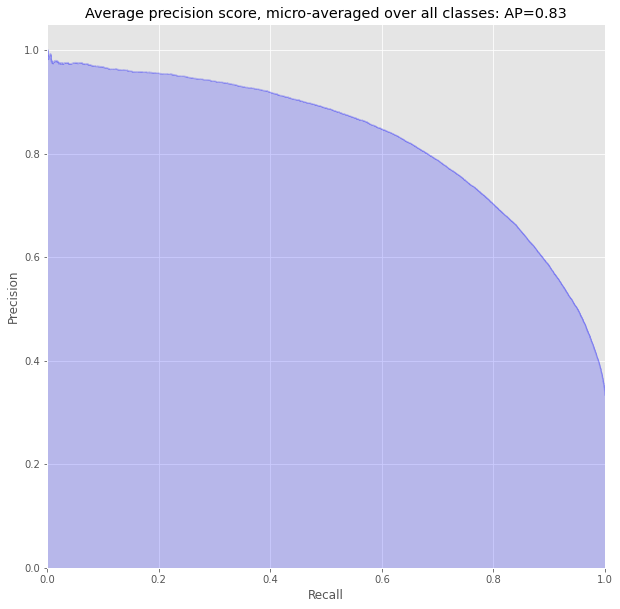

In [724]:
plotPrecision(recall, precision, average_precision)

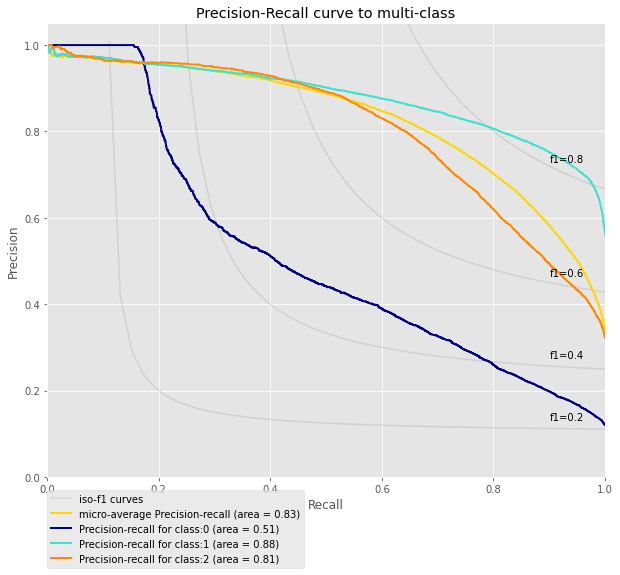

In [725]:
plotPrecisionRecall(top_classes_gen,recall,precision,average_precision)

In [726]:
lgbm_importances = best_model_lgbm.booster_.feature_importance(importance_type='gain')/sum(best_model_lgbm.booster_.feature_importance(importance_type='gain'))
importances3 = list(lgbm_importances)
feature_list3 = list(features1.columns)
feature_importances3 = [(feature, importance) for feature, importance in zip(feature_list3,importances3)]
feature_importances3 = sorted(feature_importances3, key = lambda x: x[1], reverse=True)

In [727]:
top_features_list3, top_importances3 = getImportances(feature_importances3)

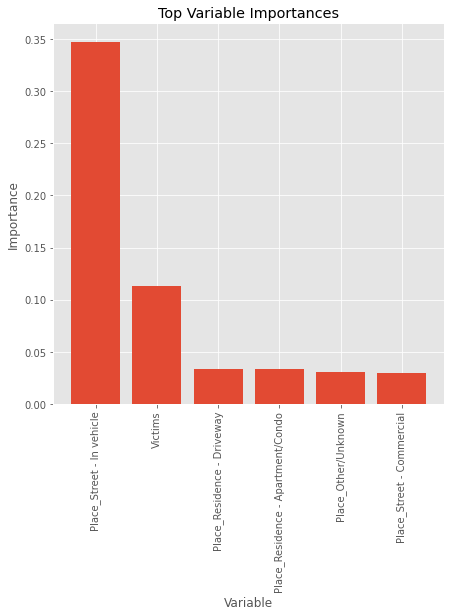

In [728]:
plotImportances(top_importances3, top_features_list3)

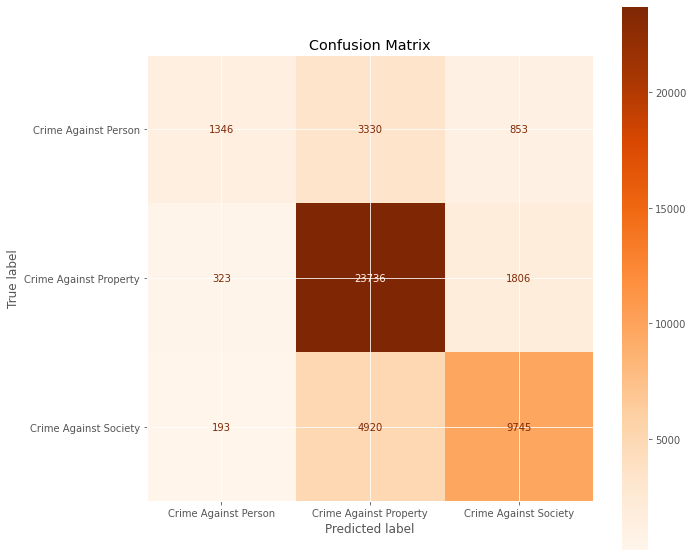

In [729]:
plot_cm(best_model_lgbm, test_gen1, test_labels_gen1, display_labels=top_classes_gen, cmap=plt.cm.Oranges)
plt.title('Confusion Matrix')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


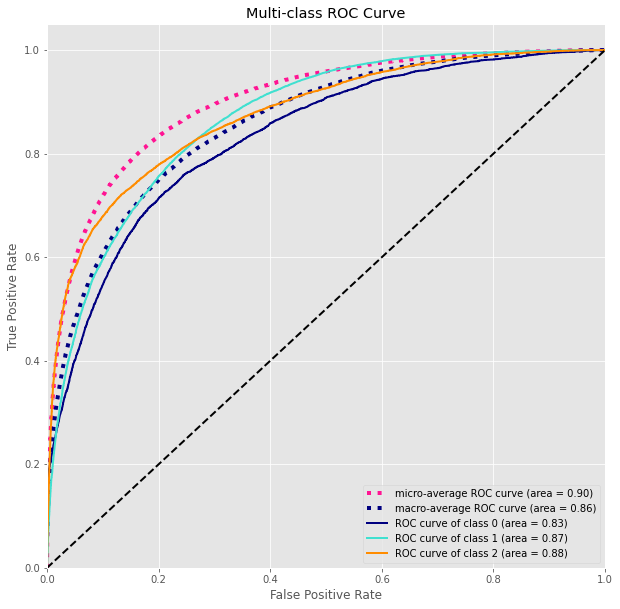

In [730]:
getROCdata(top_classes_gen,one_hot_labels_gen1,predictions_lgbm_prob)

In [731]:
precision, recall, average_precision = Precision(top_classes_gen, one_hot_labels_gen1, predictions_lgbm_prob)

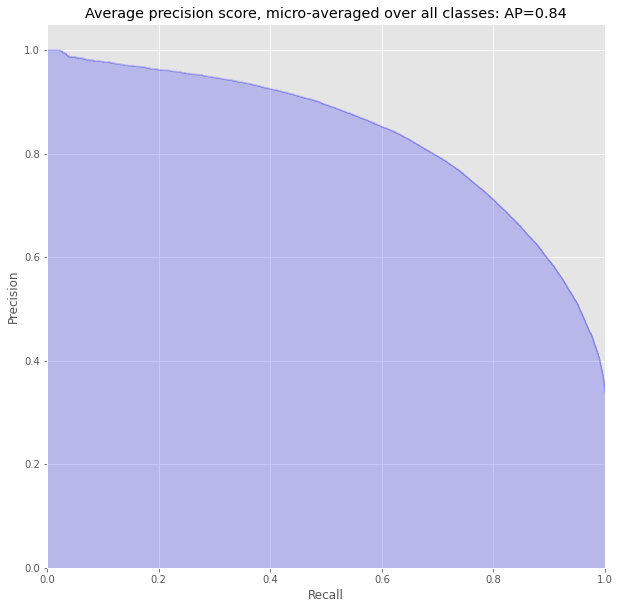

In [732]:
plotPrecision(recall, precision, average_precision)

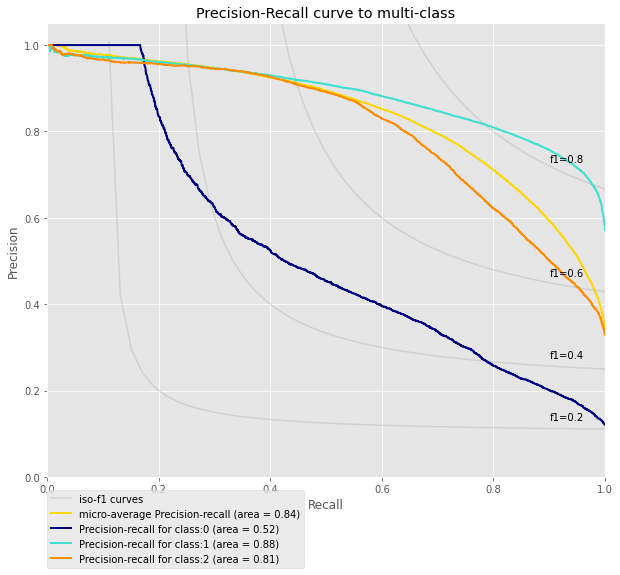

In [733]:
plotPrecisionRecall(top_classes_gen,recall,precision,average_precision)

# **Summary**

In [753]:
from sklearn.metrics import log_loss

In [754]:
acc_rf1_gen = accuracy_score(test_labels_gen1, predictions2)
prec_rf1_gen = getAvgPrecision(top_classes_gen, one_hot_labels_gen1, predictions2_prob)
prec_rf1_gen = prec_rf1_gen.get('micro')
auc_rf1_gen = getAvgAUC(test_labels_gen1, predictions2_prob)
loss_rf1_gen = log_loss(test_labels_gen1, predictions2_prob)

acc_rf1 = accuracy_score(test_labels_gen1, predictions_gen1)
prec_rf1 = getAvgPrecision(top_classes_gen, one_hot_labels_gen1, predictions_gen1_prob)
prec_rf1 = prec_rf1.get('micro')
auc_rf1 = getAvgAUC(test_labels_gen1, predictions_gen1_prob)
loss_rf1 = log_loss(test_labels_gen1, predictions_gen1_prob)

In [758]:
acc_rf_gen = accuracy_score(test_labels_gen1, predictions_gen_rf)
acc_xgb_gen = accuracy_score(test_labels_gen1, predictions_gen_xgb)
acc_lgbm_gen = accuracy_score(test_labels_gen1, predictions_gen_lgbm)

acc_rf = accuracy_score(test_labels_gen1, predictions_rf)
acc_xgb = accuracy_score(test_labels_gen1, predictions_xgb)
acc_lgbm = accuracy_score(test_labels_gen1, predictions_lgbm)

prec_rf_gen = getAvgPrecision(top_classes_gen, one_hot_labels_gen1, predictions_gen_rf_prob)
prec_xgb_gen = getAvgPrecision(top_classes_gen, one_hot_labels_gen1, predictions_gen_xgb_prob)
prec_lgbm_gen = getAvgPrecision(top_classes_gen, one_hot_labels_gen1, predictions_gen_lgbm_prob)

prec_rf = getAvgPrecision(top_classes_gen, one_hot_labels_gen1, predictions_rf_prob)
prec_xgb = getAvgPrecision(top_classes_gen, one_hot_labels_gen1, predictions_xgb_prob)
prec_lgbm = getAvgPrecision(top_classes_gen, one_hot_labels_gen1, predictions_lgbm_prob)

prec_rf_gen = prec_rf_gen.get('micro')
prec_xgb_gen = prec_xgb_gen.get('micro')
prec_lgbm_gen = prec_lgbm_gen.get('micro')

prec_rf = prec_rf.get('micro')
prec_xgb = prec_xgb.get('micro')
prec_lgbm = prec_lgbm.get('micro')

auc_rf_gen = getAvgAUC(test_labels_gen1, predictions_gen_rf_prob)
auc_xgb_gen = getAvgAUC(test_labels_gen1, predictions_gen_xgb_prob)
auc_lgbm_gen = getAvgAUC(test_labels_gen1, predictions_gen_lgbm_prob)

auc_rf = getAvgAUC(test_labels_gen1, predictions_rf_prob)
auc_xgb = getAvgAUC(test_labels_gen1, predictions_xgb_prob)
auc_lgbm = getAvgAUC(test_labels_gen1, predictions_lgbm_prob)

loss_rf_gen = log_loss(test_labels_gen1, predictions_gen_rf_prob)
loss_xgb_gen = log_loss(test_labels_gen1, predictions_gen_xgb_prob)
loss_lgbm_gen = log_loss(test_labels_gen1, predictions_gen_lgbm_prob)

loss_rf = log_loss(test_labels_gen1, predictions_rf_prob)
loss_xgb = log_loss(test_labels_gen1, predictions_xgb_prob)
loss_lgbm = log_loss(test_labels_gen1, predictions_lgbm_prob)


In [759]:
results = pd.DataFrame({'Class Balanced': [acc_rf1_gen, acc_rf_gen, acc_xgb_gen, acc_lgbm_gen, prec_rf1_gen,
                                           prec_rf_gen, prec_xgb_gen, prec_lgbm_gen, auc_rf1_gen, auc_rf_gen, auc_xgb_gen, auc_lgbm_gen,
                                          loss_rf1_gen, loss_rf_gen, loss_xgb_gen, loss_lgbm_gen], 
                        'Class Imbalanced': [acc_rf1, acc_rf, acc_xgb, acc_lgbm, prec_rf1, prec_rf, 
                                            prec_xgb, prec_lgbm, auc_rf1, auc_rf, auc_xgb, auc_lgbm, loss_rf1, loss_rf, loss_xgb, loss_lgbm]})

                       
results.index = ['Arbitrary RF Accuracy/F1/Precision/Recall Score', 'Best RF Accuracy/F1/Precision/Recall Score', 
                 'XGB Accuracy/F1/Precision/Recall Score','LGBM Accuracy/F1/Precision/Recall Score','Arbitrary RF Avg Precision Score', 'Best RF Avg Precision Score', 'XGB Avg Precision Score','LGBM Avg Precision Score', 'Arbitrary RF ROC AUC Score',
                 'Best RF ROC AUC Score','XGB ROC AUC Score', 'LGBM ROC AUC Score','Arbitrary RF Log Loss','Best RF Log Loss','XGB Log Loss',
                'LGBM Log Loss']

In [760]:
results

,Class Balanced,Class Imbalanced
Arbitrary RF Accuracy/F1/Precision/Recall Score,0.698218,0.734584
Best RF Accuracy/F1/Precision/Recall Score,0.653831,0.734411
XGB Accuracy/F1/Precision/Recall Score,0.727039,0.747946
LGBM Accuracy/F1/Precision/Recall Score,0.739038,0.752984
Arbitrary RF Avg Precision Score,0.759518,0.794571
Best RF Avg Precision Score,0.752384,0.810619
XGB Avg Precision Score,0.811029,0.828648
LGBM Avg Precision Score,0.822805,0.837172
Arbitrary RF ROC AUC Score,0.825977,0.837612
Best RF ROC AUC Score,0.832193,0.842612


In [739]:
from sklearn.metrics import precision_score

precision = precision_score(test_labels_gen1, predictions_lgbm, average='micro')
        
precision

0.7529836547608753

In [740]:
getAvgRecallScore(test_labels_gen1, predictions_lgbm)

0.7529836547608753

In [741]:
from sklearn.metrics import f1_score
f1_score(test_labels_gen1, predictions_lgbm, average='micro')

0.7529836547608753